In [34]:
import gluonbook as gb
from mxnet import autograd ,gluon,init,nd
from mxnet.gluon import data as gdata,loss as gloss,nn


In [35]:
n_train,n_test,num_inputs=20,100,200
true_w,true_b=nd.ones(shape=(num_inputs,1))*0.01,0.05
features=nd.random.normal(shape=(n_train+n_test,num_inputs))
labels=nd.dot(features,true_w)+true_b
labels+=nd.random.normal(scale=0.01,shape=labels.shape)
train_features,test_features=features[:n_train,:],features[n_train:,:]
train_labels,test_labels=labels[:n_train],labels[n_train:]

In [48]:
def init_params():
    w = nd.random.normal(scale=1, shape=(num_inputs,1))
    b = nd.zeros(shape=(1,))
    w.attach_grad()
    b.attach_grad()
    return [w, b] 

In [58]:
def l2_penalty(w):
    return (w**2).sum()/2

In [39]:
batch_size,num_epochs,lr=1,100,0.003
net,loss=gb.linreg,gb.squared_loss
train_iter=gdata.DataLoader(gdata.ArrayDataset(train_features,train_labels),batch_size,shuffle=True)


In [59]:

def fit_and_plot(lambd):
    w,b=init_params()
    train_ls,test_ls=[],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            with autograd.record():
                l=loss(net(X,w,b),y)+lambd*l2_penalty(w)
            l.backward()
            gb.sgd([w,b],lr,batch_size)
        train_ls.append(loss(net(train_features,w,b),train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features,w,b),test_labels).mean().asscalar())
    gb.semilogy(range(1,num_epochs+1),train_ls,'epoch','loss'
               ,range(1,num_epochs+1),test_ls,['train','test'])
    print('L2 norm of w:',w.norm())


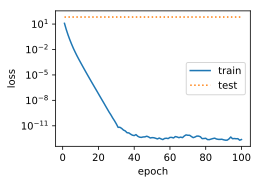

L2 norm of w: 
[12.286622]
<NDArray 1 @cpu(0)>


In [61]:
fit_and_plot(0)

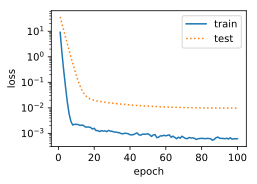

L2 norm of w: 
[0.0275024]
<NDArray 1 @cpu(0)>


In [64]:
fit_and_plot(5)

In [88]:
def fit_and_plot_gluon(weight_decay):
    net=nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize(init.Normal(sigma=1))
    trainer=gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':lr,'wd':weight_decay})
    train_ls=[]
    test_ls=[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            with autograd.record():
                l=loss(net(X),y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features),train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),test_labels).mean().asscalar())
    gb.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:',net[0].weight.data().norm())

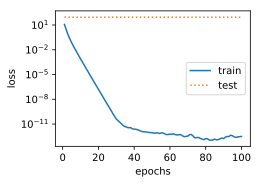

L2 norm of w: 
[13.5227585]
<NDArray 1 @cpu(0)>


In [89]:
fit_and_plot_gluon(0)

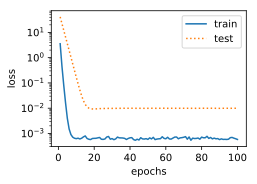

L2 norm of w: 
[0.02932488]
<NDArray 1 @cpu(0)>


In [90]:
fit_and_plot_gluon(5)